In [1]:
import tensorflow as tf

import matplotlib.pyplot as plt


In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

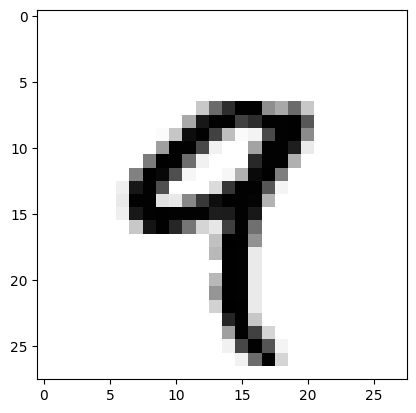

In [4]:
plt.imshow(x_train[4],cmap=plt.cm.binary)
plt.show()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
x_train= tf.keras.utils.normalize(x_train,axis=1)
x_test= tf.keras.utils.normalize(x_test,axis=1)


In [7]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [8]:
model=tf.keras.models.Sequential() #a feed forward model
model.add(tf.keras.layers.Flatten()) #takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) #a simple fully connected layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax)) # our output layer. 10 units for 10 classes. Softmax for probability distribution

In [9]:
model.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy', #how will we calculate the error to minimize the loss
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 5ms/step - loss: 0.2644 - accuracy: 0.9226
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1094 - accuracy: 0.9665
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0742 - accuracy: 0.9767
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0538 - accuracy: 0.9831
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0412 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0326 - accuracy: 0.9898
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0243 - accuracy: 0.9918
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0224 - accuracy: 0.9924
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0173 - accuracy: 0.9941
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.01

In [10]:
val_loss,val_acc=model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1157 - accuracy: 0.9746


In [11]:
val_loss

0.11571305245161057

In [12]:
val_acc

0.9746000170707703

In [14]:
model.save(r'D:\Notebooks\data\Digit-Classification\digit_model.model')

INFO:tensorflow:Assets written to: D:\Notebooks\data\Digit-Classification\digit_model.model\assets


INFO:tensorflow:Assets written to: D:\Notebooks\data\Digit-Classification\digit_model.model\assets


In [15]:
new_model=tf.keras.models.load_model(r'D:\Notebooks\data\Digit-Classification\digit_model.model')
predictions=new_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [16]:
predictions[0]

array([1.7126520e-13, 3.3448418e-13, 2.5769151e-10, 3.3804124e-09,
       1.0629195e-16, 3.5846405e-13, 1.3354519e-20, 1.0000000e+00,
       4.5351428e-14, 2.5352962e-09], dtype=float32)

In [17]:
import numpy as np

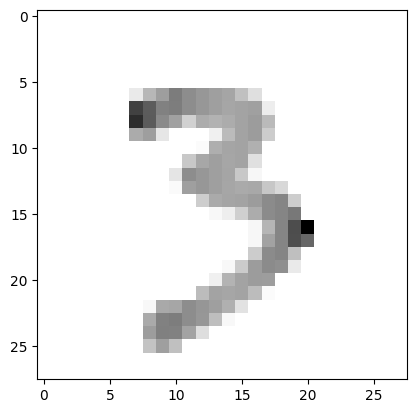

In [18]:
plt.imshow(x_test[30],cmap=plt.cm.binary)
plt.show()

In [19]:
np.argmax(predictions[30])

3